> # Etapa 1 - Exploración Visual de los Datos

---
> # Índice

1. [Introducción](#introducción)
2. [Variables del Dataset](#variables-del-dataset)
3. [Carga del Dataset](#paso-1-carga-del-dataset)
4. [Limpieza Preliminar](#paso-2-limpieza-preliminar)
5. [Análisis Descriptivo](#paso-3-análisis-descriptivo)
6. [Visualización de Patrones y Relaciones](#paso-4-visualización-de-patrones-y-relaciones)

&nbsp;

---
> # Introducción

La intención de esta etapa es realizar un primer acercamiento sobre los datos del dataset ***"diabetic_data"***. Para ello se va a aplicar todo visto en los cursos previos a esta etapa, haciendo enfásis en las tecnicas de **Análisis Exploratorio de los Datos (EDA)** y **Visualizaciones** con las librerias ***Matplotlib*** y ***Seaborn***.

El dataset representa diez años (1999-2008) de atención clínica en 130 hospitales y redes integradas de prestación de servicios en EE. UU.

Cada fila se refiere a los registros hospitalarios de pacientes con diagnóstico de diabetes, que se sometieron a análisis de laboratorio, medicamentos y permanecieron hospitalizados hasta 14 días.

El **objetivo** es determinar el reingreso temprano del paciente dentro de los 30 días posteriores al alta.

El problema es importante por las siguientes razones:
- A pesar de la evidencia de alta calidad que muestra mejores resultados clínicos para los pacientes diabéticos que reciben diversas intervenciones preventivas y terapéuticas, muchos pacientes no las reciben. Esto puede atribuirse en parte al manejo arbitrario de la diabetes en los entornos hospitalarios, que no prestan atención al control de la glucemia.
- La falta de una atención adecuada para la diabetes no solo aumenta los costos de manejo para los hospitales (a medida que los pacientes son readmitidos), sino que también afecta la morbilidad y la mortalidad de los pacientes, que pueden enfrentar complicaciones asociadas con la diabetes.

> #### Preguntas a Responder:

- ¿Cuáles son los principales factores que afectan el tiempo de hospitalización de los pacientes con diabetes?
- ¿Cuáles son las características demográficas que más influyen en la gestión de la diabetes?
- ¿Qué relación existe entre el tipo de tratamiento y los reingresos hospitalarios?
- ¿Qué tratamientos están asociados con mejores resultados clínicos?

&nbsp;

---
> # Librerias Utilizadas

In [2]:
# Manipulación de DataFrames
import pandas as pd

# Funciones matemáticas
import numpy as np

# Visualizaciónes
import matplotlib.pyplot as plt
import seaborn as sns

&nbsp;

---
> # Variables del Dataset

- ***encounter_id*** : Identificador único de un encuentro.

- ***patient_nbr*** : Identificador único de un paciente.

- ***race*** : Valores [caucásicos, asiáticos, afroamericanos, hispanos, otros].

- ***gender*** : Valores [hombre, mujer, desconocido/inválido].

- ***age*** : Grupo en intervalos de 10 años [0, 10), [10, 20) , ... , [90, 100).

- ***weight*** : Peso en Libras.

- ***admission_type_id*** : Identificador entero correspondiente a 8 valores distintos:
        
        1 = Emergency.
        2 = Urgent.
        3 = Elective.
        4 = Newborn.
        5 = Not Available.
        6 = NULL.
        7 = Trauma Center.
        8 = Not Mapped.
- ***discharge_disposition_id*** : Icono entero correspondiente a 29 valores distintos:
        
        1 = Discharged to home.
        2 = Discharged/transferred to another short term hospital.
        3 = Discharged/transferred to SNF.
        4 = Discharged/transferred to ICF.
        5 = Discharged/transferred to another type of inpatient care institution.
        6 = Discharged/transferred to home with home health service.
        7 = Left AMA.
        8 = Discharged/transferred to home under care of Home IV provider.
        9 = Admitted as an inpatient to this hospital.
        10 = Neonate discharged to another hospital for neonatal aftercare.
        11 = Expired.
        12 = Still patient or expected to return for outpatient services.
        13 = Hospice / home.
        14 = Hospice / medical facility.
        15 = Discharged/transferred within this institution to Medicare approved swing bed.
        16 = Discharged/transferred/referred another institution for outpatient services.
        17 = Discharged/transferred/referred to this institution for outpatient services.
        18 = NULL.
        19 = "Expired at home. Medicaid only, hospice".
        20 = "Expired in a medical facility. Medicaid only, hospice".
        21 = "Expired, place unknown. Medicaid only, hospice".
        22 = Discharged/transferred to another rehab fac including rehab units of a hospital.
        23 = Discharged/transferred to a long term care hospital.
        24 = Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.
        25 = Not Mapped.
        26 = Unknown/Invalid.
        27 = Discharged/transferred to a federal health care facility.
        28 = Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital.
        29 = Discharged/transferred to a Critical Access Hospital (CAH).
- ***admission_source_id*** : Icono del título entero correspondiente a 26 valores distintos:
    
        1 = Physician Referral.
        2 = Clinic Referral.
        3 = HMO Referral.
        4 = Transfer from a hospital.
        5 = Transfer from a Skilled Nursing Facility (SNF).
        6 = Transfer from another health care facility.
        7 = Emergency Room.
        8 = Court/Law Enforcement.
        9 = Not Available.
        10 = Transfer from critial access hospital.
        11 = Normal Delivery.
        12 = Premature Delivery.
        13 = Sick Baby.
        14 = Extramural Birth.
        15 = Not Available.
        17 = NULL.
        18 = Transfer From Another Home Health Agency.
        19 = Readmission to Same Home Health Agency.
        20 = Not Mapped.
        21 = Unknown/Invalid.
        22 = Transfer from hospital inpt/same fac reslt in a sep claim.
        23 = Born inside this hospital.
        24 = Born outside this hospital.
        25 = Transfer from Ambulatory Surgery Center.
        26 = Transfer from Hospice.

- ***time_in_hospital*** : Número entero de días entre admisión y alta.

- ***payer_code*** : Identificador entero correspondiente a 23 valores distintos, por ejemplo ['Blue Cross/Blue Shield', 'Medicare', 'self-pay', ...].

- ***medical_specialty*** : Identificador entero de una especialidad del médico admito, correspondiente a 84 valores distintos, por ejemplo ['cardiology', 'internal medicine', 'family/general practice', 'surgeon', ...].

- ***num_lab_procedures*** : Número de pruebas de laboratorio realizadas durante el encuentro.

- ***num_procedures*** : Número de procedimientos (distintos de las pruebas de laboratorio) realizados durante el encuentro.

- ***num_medications*** : Número de nombres genéricos distintos administrados durante el encuentro.

- ***number_outpatient*** : Número de visitas ambulatorias del paciente en el año anterior al encuentro.

- ***number_emergency*** : Número de visitas de emergencia del paciente en el año anterior al encuentro.

- ***number_inpatient*** : Número de visitas hospitalarias del paciente en el año anterior al encuentro.

- ***diag_1*** : El diagnóstico primario (codificado como los primeros tres dígitos de DAI9); 848 valores distintos.

- ***diag_2*** : Diagnóstico secundario (codificado como los tres primeros dígitos de DAI9); 923 valores distintos.

- ***diag_3*** : Diagnóstico secundario adicional (codificado como los tres primeros dígitos de DAI9); 954 valores distintos.

- ***number_diagnoses*** : Número de diagnósticos introducidos en el sistema.

- ***max_glu_serum*** : Indica el rango del resultado o si no se realizó el ensayo. Valores ['>200', '>300' , 'normal', 'none' if not measured].

- ***A1Cresult*** : Indica el rango del resultado o si no se realizó el ensayo. Valores ['>8' si el resultado fue superior al 8%, '>7' si el resultado fue superior al 7% pero inferior al 8%, 'normal' si el resultado fue inferior al 7%, 'none' si no se midió].

- ***metformin*** : La función indica si el fármaco fue recetado o hubo un cambio en la dosis. Valores ['up' si la dosis se incrementó durante el encuentro, 'down' si la dosis se disminuía, 'steady' si la dosis no cambiaba, 'no' si el medicamento no se le había recetado].

- ***repaglinide*** : Indica si el fármaco fue recetado o hubo un cambio en la dosis. Valores ['up' si la dosis se incrementó durante el encuentro, 'down' si la dosis se disminuía, 'steady' si la dosis no cambiaba, 'no' si el medicamento no se le había recetado].

- ***nateglinide*** : Indica si el fármaco fue recetado o hubo un cambio en la dosis. Valores ['up' si la dosis se incrementó durante el encuentro, 'down' si la dosis se disminuía, 'steady' si la dosis no cambiaba, 'no' si el medicamento no se le había recetado].

- ***chlorpropamide*** : Indica si el fármaco fue recetado o hubo un cambio en la dosis. Valores ['up' si la dosis se incrementó durante el encuentro, 'down' si la dosis se disminuía, 'steady' si la dosis no cambiaba, 'no' si el medicamento no se le había recetado].

- ***glimepiride*** : Indica si el fármaco fue recetado o hubo un cambio en la dosis. Valores ['up' si la dosis se incrementó durante el encuentro, 'down' si la dosis se disminuía, 'steady' si la dosis no cambiaba, 'no' si el medicamento no se le había recetado].

- ***acetohexamide*** : Indica si el fármaco fue recetado o hubo un cambio en la dosis. Valores ['up' si la dosis se incrementó durante el encuentro, 'down' si la dosis se disminuía, 'steady' si la dosis no cambiaba, 'no' si el medicamento no se le había recetado].

- ***glipizide*** : Indica si el fármaco fue recetado o hubo un cambio en la dosis. Valores ['up' si la dosis se incrementó durante el encuentro, 'down' si la dosis se disminuía, 'steady' si la dosis no cambiaba, 'no' si el medicamento no se le había recetado].

- ***glyburide*** : Indica si el fármaco fue recetado o hubo un cambio en la dosis. Valores ['up' si la dosis se incrementó durante el encuentro, 'down' si la dosis se disminuía, 'steady' si la dosis no cambiaba, 'no' si el medicamento no se le había recetado].

- ***tolbutamide*** : Indica si el fármaco fue recetado o hubo un cambio en la dosis. Valores ['up' si la dosis se incrementó durante el encuentro, 'down' si la dosis se disminuía, 'steady' si la dosis no cambiaba, 'no' si el medicamento no se le había recetado].

- ***pioglitazone*** : Indica si el fármaco fue recetado o hubo un cambio en la dosis. Valores ['up' si la dosis se incrementó durante el encuentro, 'down' si la dosis se disminuía, 'steady' si la dosis no cambiaba, 'no' si el medicamento no se le había recetado].

- ***rosiglitazone*** : Indica si el fármaco fue recetado o hubo un cambio en la dosis. Valores ['up' si la dosis se incrementó durante el encuentro, 'down' si la dosis se disminuía, 'steady' si la dosis no cambiaba, 'no' si el medicamento no se le había recetado].

- ***acarbose*** : Indica si el fármaco fue recetado o hubo un cambio en la dosis. Valores ['up' si la dosis se incrementó durante el encuentro, 'down' si la dosis se disminuía, 'steady' si la dosis no cambiaba, 'no' si el medicamento no se le había recetado].

- ***miglitol*** : Indica si el fármaco fue recetado o hubo un cambio en la dosis. Valores ['up' si la dosis se incrementó durante el encuentro, 'down' si la dosis se disminuía, 'steady' si la dosis no cambiaba, 'no' si el medicamento no se le había recetado].

- ***troglitazone*** : Indica si el fármaco fue recetado o hubo un cambio en la dosis. Valores ['up' si la dosis se incrementó durante el encuentro, 'down' si la dosis se disminuía, 'steady' si la dosis no cambiaba, 'no' si el medicamento no se le había recetado].

- ***tolazamide*** : Indica si el fármaco fue recetado o hubo un cambio en la dosis. Valores ['up' si la dosis se incrementó durante el encuentro, 'down' si la dosis se disminuía, 'steady' si la dosis no cambiaba, 'no' si el medicamento no se le había recetado].

- ***examide*** : Indica si el fármaco fue recetado o hubo un cambio en la dosis. Valores ['up' si la dosis se incrementó durante el encuentro, 'down' si la dosis se disminuía, 'steady' si la dosis no cambiaba, 'no' si el medicamento no se le había recetado].

- ***citoglipton*** : Indica si el fármaco fue recetado o hubo un cambio en la dosis. Valores ['up' si la dosis se incrementó durante el encuentro, 'down' si la dosis se disminuía, 'steady' si la dosis no cambiaba, 'no' si el medicamento no se le había recetado].

- ***insulin*** : Indica si el fármaco fue recetado o hubo un cambio en la dosis. Valores ['up' si la dosis se incrementó durante el encuentro, 'down' si la dosis se disminuía, 'steady' si la dosis no cambiaba, 'no' si el medicamento no se le había recetado].

- ***glyburide-metformin*** : Indica si el fármaco fue recetado o hubo un cambio en la dosis. Valores ['up' si la dosis se incrementó durante el encuentro, 'down' si la dosis se disminuía, 'steady' si la dosis no cambiaba, 'no' si el medicamento no se le había recetado].

- ***glipizide-metformin*** : Indica si el fármaco fue recetado o hubo un cambio en la dosis. Valores ['up' si la dosis se incrementó durante el encuentro, 'down' si la dosis se disminuía, 'steady' si la dosis no cambiaba, 'no' si el medicamento no se le había recetado].

- ***glimepiride-pioglitazone*** : Indica si el fármaco fue recetado o hubo un cambio en la dosis. Valores ['up' si la dosis se incrementó durante el encuentro, 'down' si la dosis se disminuía, 'steady' si la dosis no cambiaba, 'no' si el medicamento no se le había recetado].

- ***metformin-rosiglitazone*** : Indica si el fármaco fue recetado o hubo un cambio en la dosis. Valores ['up' si la dosis se incrementó durante el encuentro, 'down' si la dosis se disminuía, 'steady' si la dosis no cambiaba, 'no' si el medicamento no se le había recetado].

- ***metformin-pioglitazone*** : Indica si el fármaco fue recetado o hubo un cambio en la dosis. Valores ['up' si la dosis se incrementó durante el encuentro, 'down' si la dosis se disminuía, 'steady' si la dosis no cambiaba, 'no' si el medicamento no se le había recetado].

- ***change*** : Indica si hubo un cambio en los medicamentos diabéticos (o dosis o nombre genérico). Valores ['change', 'no change'].

- ***diabetesMed*** : Indica si se le recetó algún medicamento diabético. Valores ['yes', 'no'].

- ***readmitted*** : Días para la readmisión hospitalaria. Valores ['<30' si el paciente fue readmitido en menos de 30 días, '>30 dias' si el paciente fue readmitido en más de 30 días, 'No' ningún registro de readmisión].

&nbsp;

---
> # Paso 1: Carga del Dataset

In [3]:
# Se almacena la dirección donde se encuentra el dataset en una variable.
# La dirección apunta la misma carpeta, para que al cambiar la ubicación de la carpeta no hay que actualizar la dirección.

data_location = r"FuentesDeDatos_Diabetes/diabetic_data.csv"

# Luego se lee y guarda el dataset en un DataFrame utilizando Pandas.

df = pd.read_csv(data_location, delimiter=',')

In [4]:
# "df.shape" muestar la cantidad de filas y columnas del DataFrame.

print("Filas, Columnas:", df.shape)

Filas, Columnas: (101766, 50)


In [5]:
# "df.info" muestra todas las columnas del DataFrame, indicando:
#     - Indices.
#     - Nombres de las columnas.
#     - Conteo de valores no nulos.
#     - Tipo de dato.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [6]:
# Variables Numéricas
df.dtypes[df.dtypes == "int64"]

encounter_id                int64
patient_nbr                 int64
admission_type_id           int64
discharge_disposition_id    int64
admission_source_id         int64
time_in_hospital            int64
num_lab_procedures          int64
num_procedures              int64
num_medications             int64
number_outpatient           int64
number_emergency            int64
number_inpatient            int64
number_diagnoses            int64
dtype: object

In [7]:
# Variables Categóricas
df.dtypes[df.dtypes == 'object']

race                        object
gender                      object
age                         object
weight                      object
payer_code                  object
medical_specialty           object
diag_1                      object
diag_2                      object
diag_3                      object
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object
tolbutamide                 object
pioglitazone                object
rosiglitazone               object
acarbose                    object
miglitol                    object
troglitazone                object
tolazamide                  object
examide                     object
citoglipton                 object
insulin             

In [8]:
# "head()" muestra los primeros registros del DataFrame. Por defecto muestra los primeros 5
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


> #### Observaciones: 
- En el dataframe hay registros que resaltan debido a que tienen columnas con valores " ? ".
- Este valor indica que no se realizo el registro o se desconoce el valor de de dicha columna.
- En la proxima etapa, se transformaran a valores "NaN" para no alterar las futuras visualizaciones.

&nbsp;

---
> # Paso 2: Limpieza Preliminar

#### Para realizar una limpieza preliminar de los datos, primero se tienen que revisar la existencia de valores nulos, faltantes, duplicados y erroneos.

In [9]:
# "isnull()" detecta valores nulos o faltantes
# "sum()" realiza un conteo

# Concatenar ambas funciones devuleve la cantidad de valores nulos por cada columna.

print("Cantidad de valores nulos por columna:")
df.isnull().sum()

Cantidad de valores nulos por columna:


encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

> #### Observaciones:
- Las columnas **"max_glu_serum"** y **"A1Cresult"** tienen más del 80 % de sus registros con valor nulo.
- Al ser dos variables muy relevantes para el análisis de los datos (**"max_glu_serum"** = cantidad de glucosa en suero y **"A1Cresult"** = prueba de hemoglobina) no se van a descartar.
___

In [10]:
# "duplicated()" devuelve una serie booleana que indica las filas duplicadas
# "sum()" realiza un conteo

# Concatenar ambas funciones devuelve la cantidad de filas duplicadas

cant_filas_duplicadas = df['encounter_id'].duplicated().sum()
print("Cantidad de filas duplicadas:", cant_filas_duplicadas)

Cantidad de filas duplicadas: 0


In [11]:
# Como se mencionaba en la etapa anterior, se reemplazan los caracteres '?' de los registros con 'none'.

# "replace()" reemplaza todos los caracteres '?' a 'none'

df = df.replace("?", "none")

df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),none,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),none,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),none,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),none,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),none,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


> #### Observaciones:
- Todos los registros que tenian columnas con caracteres **'?'** ahora tienen **"none"**
- Se eligio **"none"** debido a que en el resto de columnas se utiliza para indicar que no se registro o no se midio un valor.
___

&nbsp;

# Paso 3: Análisis Descriptivo
___

### El objetivo principal de la estadística descriptiva es **"describir y comprender las caracteristicas básicas de los datos, sin hacer inferencias o conclusiones más alla de los datos"**.

> ## Cálculo de estadísticas descriptivas

Para esta dataset se van obtener los resultados de las variables numéricas más importantes:
- "time_in_hospital".
- "num_lab_procedures".
- "num_procedures".
- "num_medications".
- "number_inpatient"

> #### Nota: No se realiza un análisis sobre el resto de las variables numéricas debido a que corresponden a identificadores, y no cantidades.

In [12]:
variables_numericas = ['time_in_hospital', 'num_lab_procedures', 'num_procedures','num_medications', 'number_inpatient']

# "describe()" devuelve las estadísticas descriptivas de las columnas indicadas del DataFrame

df[variables_numericas].describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_inpatient
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,4.395987,43.095641,1.339730,16.021844,0.635566
std,2.985108,19.674362,1.705807,8.127566,1.262863
min,1.000000,1.000000,0.000000,1.000000,0.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000
75%,6.000000,57.000000,2.000000,20.000000,1.000000
max,14.000000,132.000000,6.000000,81.000000,21.000000


> **count** = Muestra la cantidad de registros.
- Las 5 columnas coinciden el primer acercamiento del dataset en la primer etapa, indicando que hay 101.766 registros.

> **mean** = Media aritmética / Promedio. Suma de todos los valores dividido por la cantidad de valores.
- "time_in_hospital" = 4 dias.
- "num_lab_procedures" = 43 procedimientos de laboratorio realizados durante el encuentro.
- "num_procedures" = 1 procedimiento (Distinto del procedimeinto de laboratorio) realizados durante el encuentro.
- "num_medications" = 16 medicaciones.
- "number_inpatient" = 1 visita hospitalaria del paciente durante el año anterior al encuentro.

> **std** = Desvió estándar. Indica que tan dispersos están los datos. De manera arbitraria se toma el siguiente criterio; Desviación BAJA < 33,33 % / Desviación INTERMEDIA < 66,67 % / Desviación ALTA > 66,67 %.

- "time_in_hospital" = 2,98 dias (Desviacion ALTA) 67,88 %.
- "num_lab_procedures" = 19,67 procedimientos de laboratorio (Desviacion INTERMEDIA) 45,64 %.
- "num_procedures" = 1.70 procedimientos (Des)
- "num_medications" = 8,12 medicaciones (Desviación INTERMEDIA) 50,68 %.
- "number_inpatient" = 1,26 visitas hospitalarias del paciente durante el año anterior.

> **max** = Valor máximo.
- "time_in_hospital" = 14 dias.
- "num_lab_procedures" = 132 procedimientos de laboratorio.
- "num_procedures" = 6 procedimientos (Distintos de los procedimientos de laboratorio) realizados durante el encuentro.
- "num_medications" = 81 medicaciones.
- "number_inpatient" = 21 visitas hospitalarias del paciente durante el año anterior.

> #### Notas:
- A las **medidas de tendencia central** se les aplica un redondeo al entero mas cercano, evitando un criterio arbitrario.
- Esto se realiza para que los datos sean más faciles de leer / explicar.
- En las visualizaciones se va a trabajar con todos los decimales.

&nbsp;
___

> ## Distribuciones de Variables Demográficas

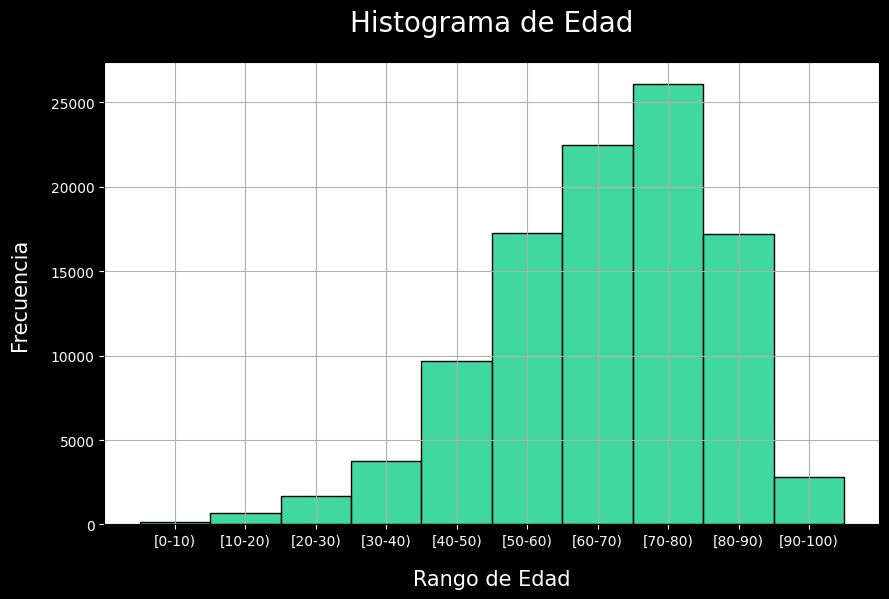

In [13]:
# ================================
# Histograma de la variable 'age'
# ================================

plt.figure(figsize=(10, 6), facecolor='black')

sns.histplot(df['age'], color='#00cc7e')

plt.title("Histograma de Edad", color='white', fontsize=20,  y=1.05)
plt.xlabel("Rango de Edad", color='white', fontsize=15, labelpad=15)
plt.ylabel("Frecuencia", color='white', fontsize=15, labelpad=15)
plt.tick_params(axis='both', colors='white')

plt.grid(True)
plt.show()

In [14]:
# "value_count()" devuelve la cantidad de veces (Frecuencia) que se repite un valor dentro de la columna indicada del DataFrame

print("Frecuencia de 'age':")
df['age'].value_counts().reset_index()

Frecuencia de 'age':


,age,count
0,[70-80),26068
1,[60-70),22483
2,[50-60),17256
3,[80-90),17197
4,[40-50),9685
5,[30-40),3775
6,[90-100),2793
7,[20-30),1657
8,[10-20),691
9,[0-10),161


> #### Observaciones:

- Los adultos mayores son los mas afectados por la diabetes.
- El grupo de edad con mayor frecuencia en el dataset es [70 - 80).
- Presenta una **Asimetría Negativa** (Sesgo a la izquierda) debido a que la  mayoria de valores se agrupan hacia la derecha.

&nbsp;

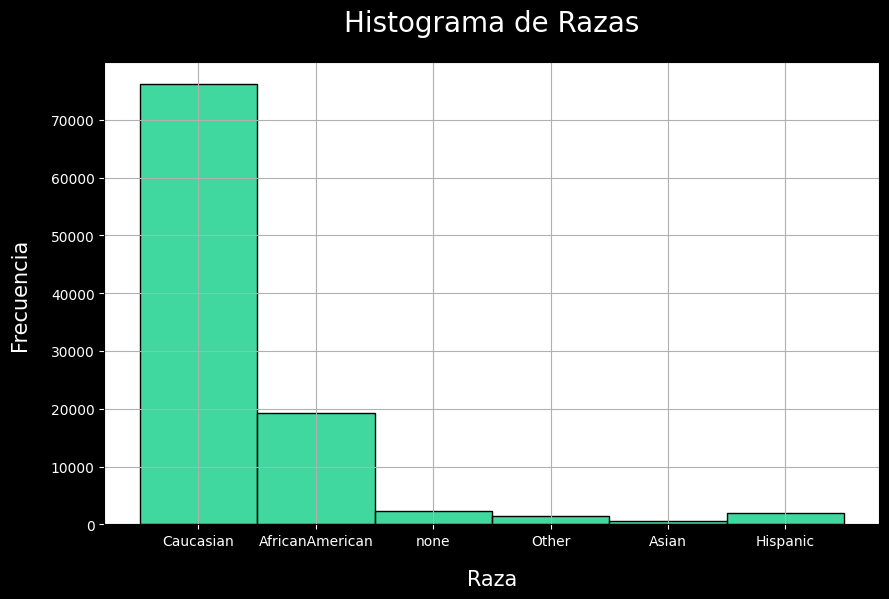

In [15]:
# =================================
# Histograma de la variable 'race'
# =================================

plt.figure(figsize=(10, 6), facecolor='black')

sns.histplot(df['race'], color='#00cc7e')

plt.title("Histograma de Razas", color='white', fontsize=20,  y=1.05)
plt.xlabel("Raza", color='white', fontsize=15, labelpad=15)
plt.ylabel("Frecuencia", color='white', fontsize=15, labelpad=15)
plt.tick_params(axis='both', colors='white')

plt.grid(True)
plt.show()

In [16]:
# "value_count()" devuelve la cantidad de veces (Frecuencia) que se repite un valor dentro de la columna indicada del DataFrame

print("Frecuencia de 'race':")
df['race'].value_counts().reset_index()

Frecuencia de 'race':


,race,count
0,Caucasian,76099
1,AfricanAmerican,19210
2,none,2273
3,Hispanic,2037
4,Other,1506
5,Asian,641


> #### Observaciones:

- La raza con mayor frecuencia son los **caucásicos**.
- Presenta una **Asimetría Positiva** (Sesgo a la derecha) debido a que la  mayoria de valores se agrupan hacia la izquierda.

&nbsp;

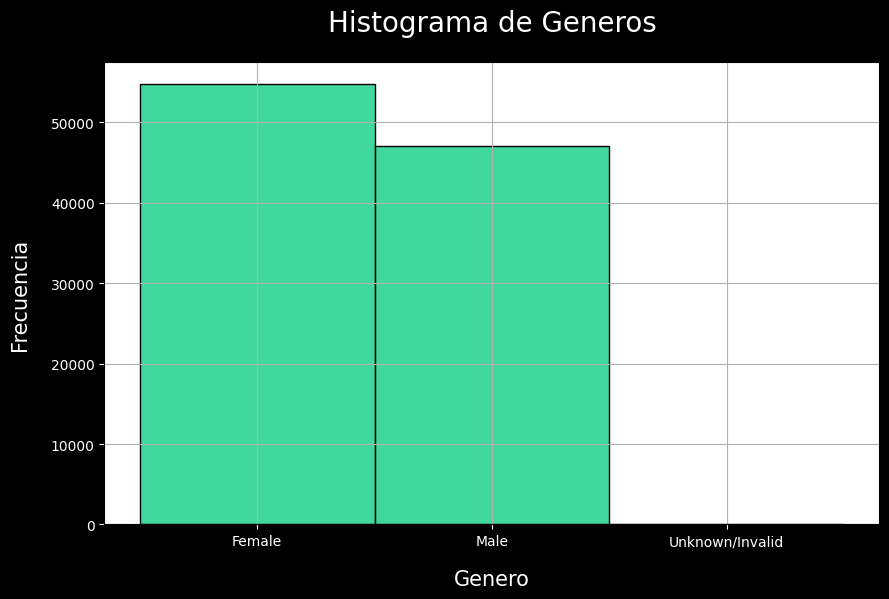

In [17]:
# ===================================
# Histograma de la variable 'gender'
# ===================================

plt.figure(figsize=(10, 6), facecolor='black')

sns.histplot(df['gender'], color='#00cc7e')

plt.title("Histograma de Generos", color='white', fontsize=20,  y=1.05)
plt.xlabel("Genero", color='white', fontsize=15, labelpad=15)
plt.ylabel("Frecuencia", color='white', fontsize=15, labelpad=15)
plt.tick_params(axis='both', colors='white')

plt.grid(True)
plt.show()

In [18]:
# "value_count()" devuelve la cantidad de veces (Frecuencia) que se repite un valor dentro de la columna indicada del DataFrame

print("Frecuencia de 'gender':")
df['gender'].value_counts().reset_index()

Frecuencia de 'gender':


,gender,count
0,Female,54708
1,Male,47055
2,Unknown/Invalid,3


> #### Observaciones:

- El genero con mayor frecuencia es el **femenino**. Aun asi, la diferencia con el genero masculino no es 
- Hay 3 registros con genero **Unknow/Invalid** que se podrian llegar a considerar como **outliers**.
- Presenta una **Asimetría Positiva** (Sesgo a la derecha) debido a que la  mayoria de valores se agrupan hacia la izquierda.

&nbsp;
___

> ## Proporciones de Readmisión

In [19]:
# "value_counts()" realiza un conteo de cuantas veces aparece un valor unico en una determinada columnas.
# Se aplica el parametro "normalize = True" para mostrar proporciones. Luego se multiplica por 100 para obtener porcentajes.

df['readmitted'].value_counts(normalize=True).reset_index()

,readmitted,proportion
0,NO,0.539119
1,>30,0.349282
2,<30,0.111599


> #### El método **"value_counts"** devuelve lo siguiente:

- El 53,91 % de los pacientes **NO son readmitidos**.
- El 34,92 % de los pacientes son readmitidos **luego de 30 dias**.
- El 11,15 % de los pacientes son readmitidos **antes de los 30 dias**.

&nbsp;
___

> ## Identificación de Outliers

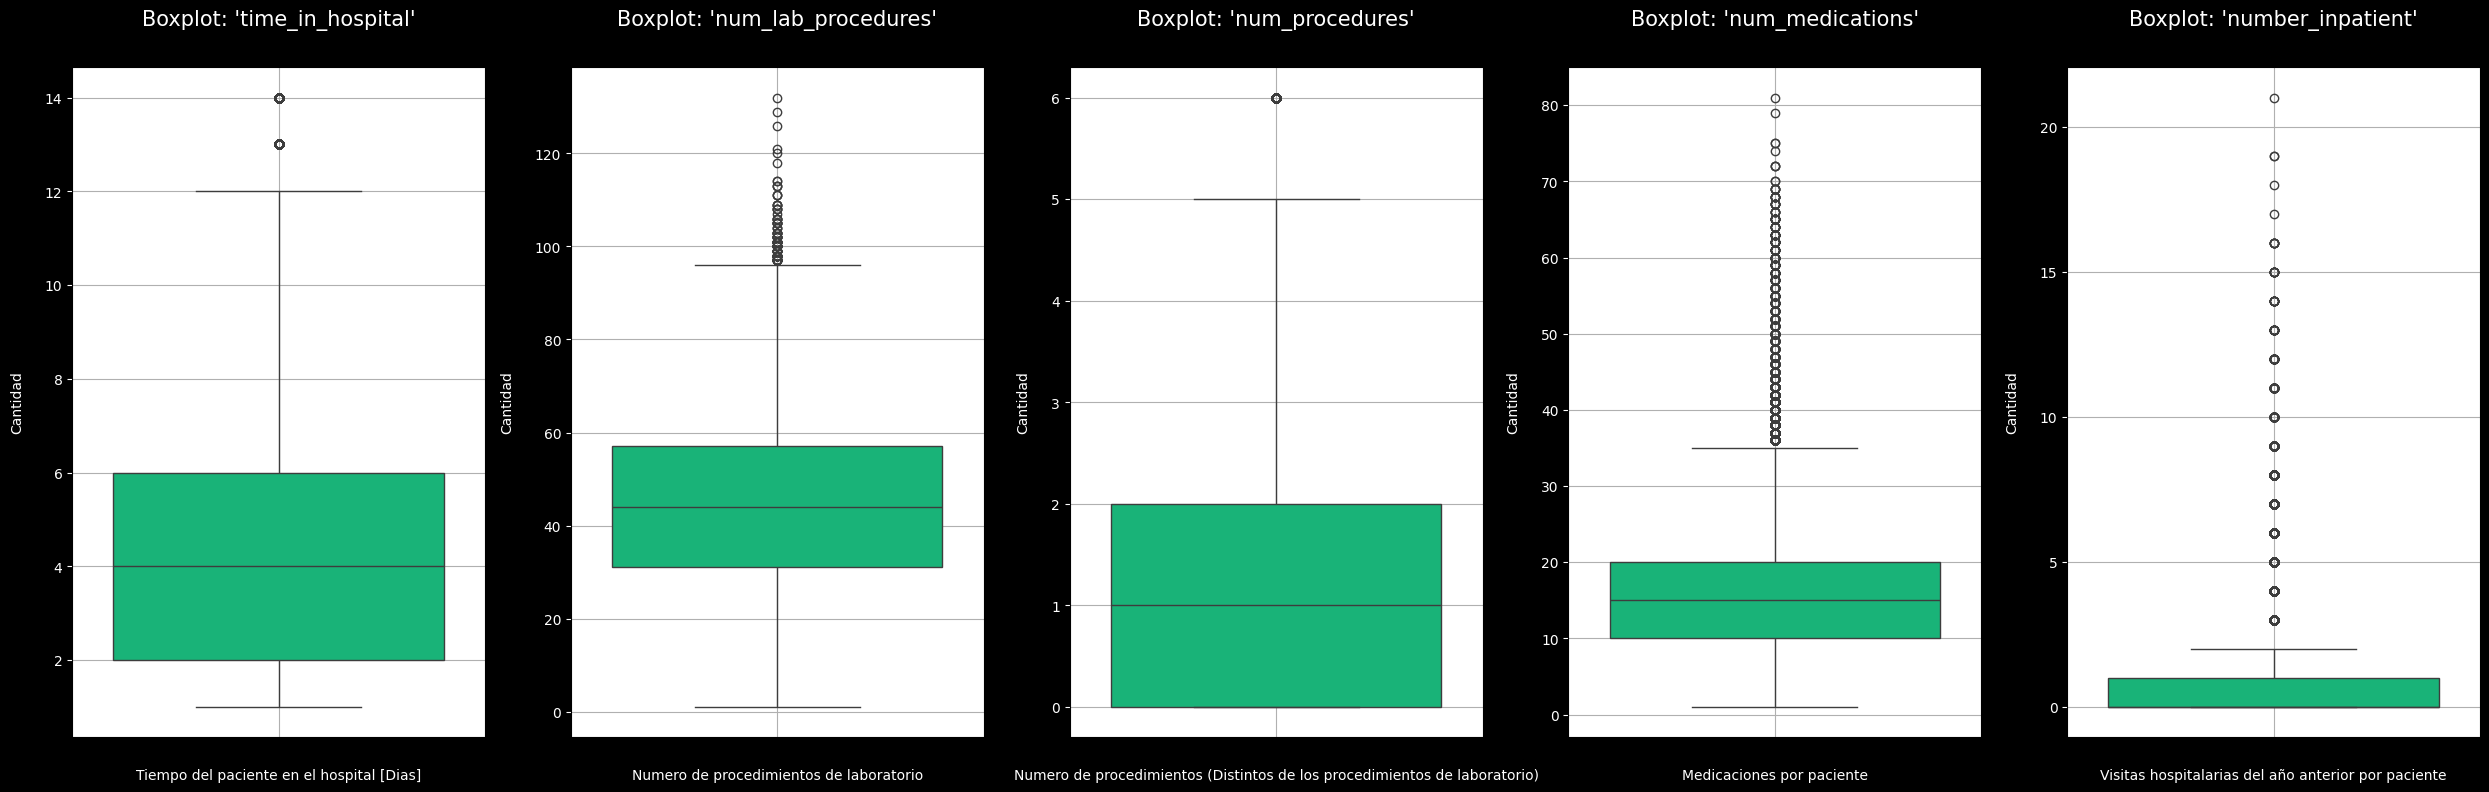

In [20]:
# =================================================================
# Boxplots de las variables 'num_medications' y 'number_inpatient'
# =================================================================

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(25, 8), facecolor='black')

# Boxplot de la variable 'time_in_hospital'
sns.boxplot(data=df['time_in_hospital'], ax=axs[0], color='#00cc7e')
axs[0].set_title("Boxplot: 'time_in_hospital'", color='white', fontsize=15,  y=1.05)
axs[0].set_xlabel("Tiempo del paciente en el hospital [Dias]", color='white', fontsize=10, labelpad=15)
axs[0].set_ylabel("Cantidad", color='white', fontsize=10, labelpad=15)

axs[0].tick_params(axis='y', colors='white')
axs[0].grid(True)

# Boxplot de la variable 'num_lab_procedures'
sns.boxplot(data=df['num_lab_procedures'], ax=axs[1], color='#00cc7e')
axs[1].set_title("Boxplot: 'num_lab_procedures'", color='white', fontsize=15,  y=1.05)
axs[1].set_xlabel("Numero de procedimientos de laboratorio", color='white', fontsize=10, labelpad=15)
axs[1].set_ylabel("Cantidad", color='white', fontsize=10, labelpad=15)

axs[1].tick_params(axis='y', colors='white')
axs[1].grid(True)

# Boxplot de la variable 'num_procedures'
sns.boxplot(data=df['num_procedures'], ax=axs[2], color='#00cc7e')
axs[2].set_title("Boxplot: 'num_procedures'", color='white', fontsize=15,  y=1.05)
axs[2].set_xlabel("Numero de procedimientos (Distintos de los procedimientos de laboratorio)", color='white', fontsize=10, labelpad=15)
axs[2].set_ylabel("Cantidad", color='white', fontsize=10, labelpad=15)

axs[2].tick_params(axis='y', colors='white')
axs[2].grid(True)

# Boxplot de la variable 'num_medications'
sns.boxplot(data=df['num_medications'], ax=axs[3], color='#00cc7e')
axs[3].set_title("Boxplot: 'num_medications'", color='white', fontsize=15,  y=1.05)
axs[3].set_xlabel("Medicaciones por paciente", color='white', fontsize=10, labelpad=15)
axs[3].set_ylabel("Cantidad", color='white', fontsize=10, labelpad=15)

axs[3].tick_params(axis='y', colors='white')
axs[3].grid(True)

# Boxplot de la variable 'number_inpatiente'
sns.boxplot(data=df['number_inpatient'], ax=axs[4], color='#00cc7e')
axs[4].set_title("Boxplot: 'number_inpatient'", color='white', fontsize=15,  y=1.05)
axs[4].set_xlabel("Visitas hospitalarias del año anterior por paciente", color='white', fontsize=10, labelpad=15)
axs[4].set_ylabel("Cantidad", color='white', fontsize=10, labelpad=15)

axs[4].tick_params(axis='y', colors='white')
axs[4].grid(True)

plt.tight_layout()
plt.show()

In [21]:
# median() devuelve las medianas de las variables indicadas del DataFrame

print("Medianas:")
df[variables_numericas].median()

Medianas:


time_in_hospital       4.0
num_lab_procedures    44.0
num_procedures         1.0
num_medications       15.0
number_inpatient       0.0
dtype: float64

> #### Observaciones:

**Boxplot: 'time_in_hospital':**
- La mayoria de los pacientes pasa entre 2 y 6 dias entre la admisión y el alta.
- La mediana es de 4 dias.
- Los valores típicos no superan los 12 dias.
- Los valores atípicos superan los 13 dias.

**Boxplot: 'num_lab_procedures':**
- La mayoria de los pacientes se realizan entre 30 y 60 procedimientos de laboratorio.
- La mediana es de 44 procedimientos de laboratorio.
- Los valores típicos no superan alrededor de los 95 procedimientos de laboratorio.
- Los valores atípicos superan los 120 procedimientos de laboratorio.

**Boxplot: 'num_procedures':**
- La mayoria de los pacientes se realizan entre 0 y 2 procedimientos (Distintos de los procedimientos de laboratorio).
- La mediana es de 1 procedimiento (Distinto del procedimiento de laboratorio).
- Los valores típicos no superan los 5 procedimeientos (Distintos de los procedimientos de laboratorio).
- Los valores atípicos alcanzan los 6 procedimientos (Distintos de los procedimientos de laboratorio).

**Boxplot: 'num_medications':**
- La mayoria de los pacientes toman entre 10 y 20 medicamentos.
- La mediana es de 15 medicaciones.
- Los valores típicos no superan las 35 medicaciones por paciente. 
- Los valores atípicos superan más de 80 medicaciones por paciente.

**Boxplot: 'number_inpatient':**
- La mayoria de los pacientes tuvo 0 o 1 visitas hospitalarias en el año anterior.
- La mediana es 0 (La mitad de los pacientes no fue hospitalizada el año anterior).
- Los valores tipicos no superan 2 hospitalizaciones el año anterior.
- Los valores atípicos son de más de 20 hospitalizaciones durante el año anterior.

&nbsp;

# Paso 4: Visualización de Patrones y Relaciones
___

> #### Como primer paso para identificar relaciones entre las variables del dataset, se va a utilizar un **"Heatmap"** con variables **numéricas** analizadas previamente.

> #### Observaciones:

- En el centro del grafico se destacan las variables con mayor relación entre ellas.
- Las variables mas importantes son: 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medicationes'.
- Para visualizar con más claridad las relacciones entre las variables mencionadas, se realiza un nuevo **"Heatmap"**.

In [23]:
# "corr()" para una matriz de correlacion de las variables mencionadas
correlation_matrix = df[variables_numericas].corr()

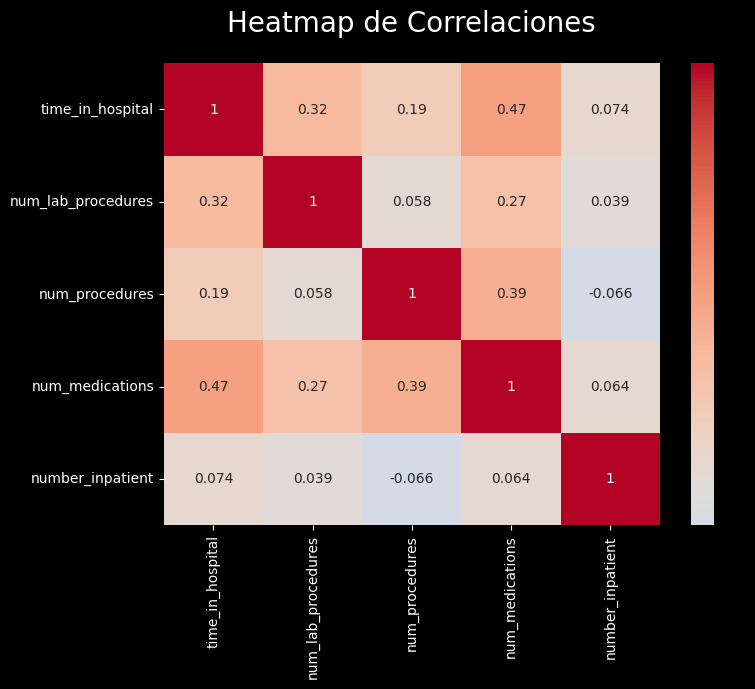

In [24]:
# =================================================================
# Heatmap de la matriz de correlación de las variables mencionadas
# =================================================================

plt.figure(figsize=(8,6), facecolor='black')

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Heatmap de Correlaciones", color='white', fontsize=20, y=1.05)
plt.tick_params(axis='both', colors='white')

plt.show()

> #### Observaciones:

- La relaciones mas fuertes son entre "time_in_hospital", "num_medications" y "num_procedures"
- La relacion mas debil es "num_lab_procedures" con "number_inpatient"

&nbsp;
___

> ## Distribución de variables numéricas

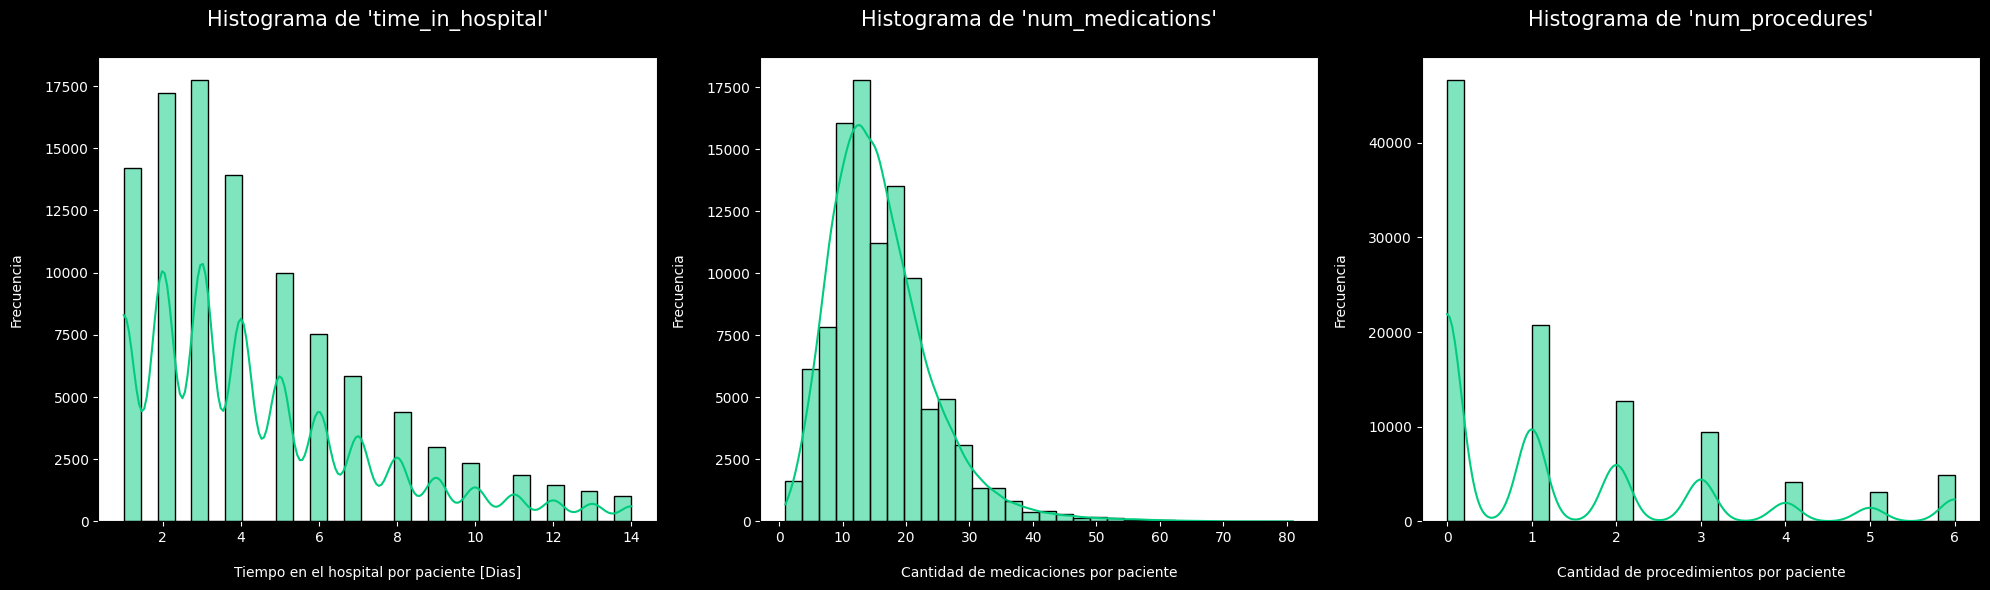

In [25]:
# =======================================================
# Histogramas de las variables numéricas más importantes
# =======================================================

varaibles_relacionadas = ['time_in_hospital', 'num_medications', 'num_procedures']
leyendas = ['Tiempo en el hospital por paciente [Dias]', 'Cantidad de medicaciones por paciente', 'Cantidad de procedimientos por paciente']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,6), facecolor='black')

for i in range(0, 3):

    sns.histplot(data=df[varaibles_relacionadas[i]], ax=axs[i], bins=30, kde=True, color='#00cc7e')
    
    axs[i].set_title(f"Histograma de '{varaibles_relacionadas[i]}'", color='white', fontsize=15, y=1.05)
    axs[i].set_xlabel(leyendas[i], color='white', fontsize=10, labelpad=15)
    axs[i].set_ylabel("Frecuencia", color='white', fontsize=10, labelpad=15)
    axs[i].tick_params(axis='both', colors='white')

plt.tight_layout()
plt.show()

> #### Observaciones:

**Histograma: 'time_in_hospital'**:
- La mayoria pacientes pasan entre 2 y 4 dias en el hospital.
- Esta sesgado a la derecha.

**Histograma 'num_medications':**
- La mayoria de medicaciones por paciente esta entre 10 y 20.
- Esta sesgado a la derecha

**Histograma 'num_procedures':**
- La mayoria de procedimientos realizados son entre 0 y 1.
- Esta sesgado a la derecha

&nbsp;
___

> ## Relacion entre variables numéricas

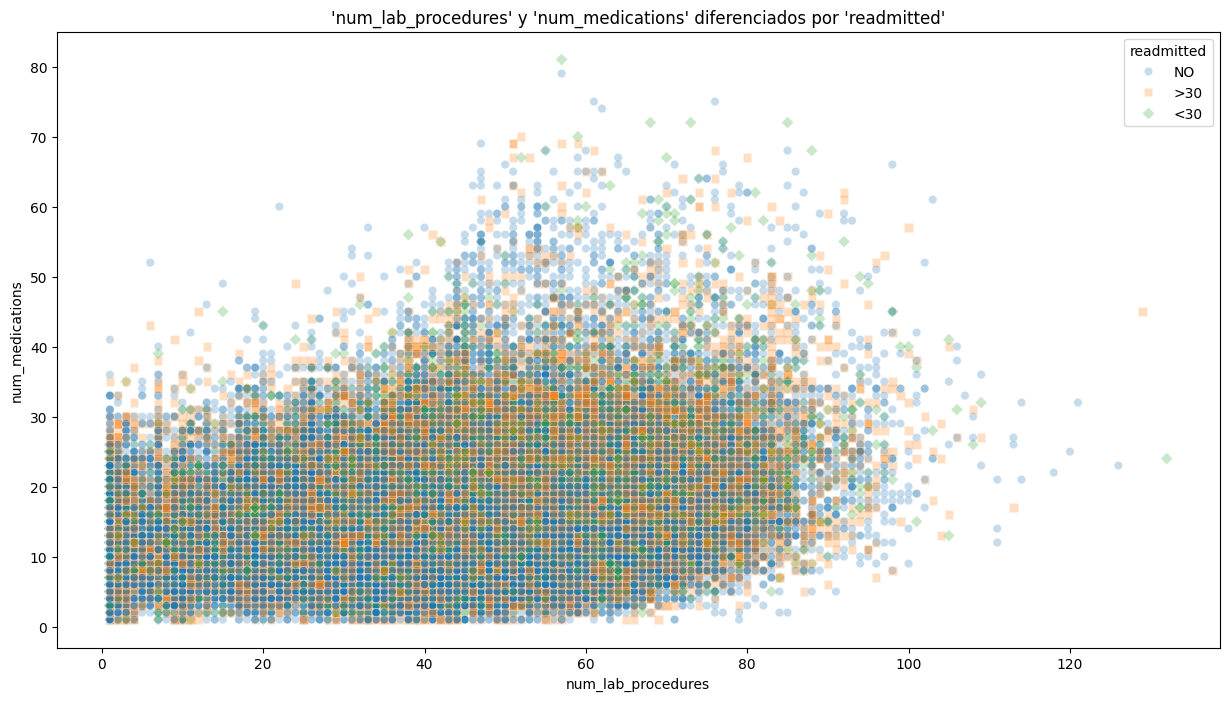

In [26]:
# ==========================================================================================
# Scatterplot de procedimientos de laboratorio y medicamentos, diferenciados por readmisión
# ==========================================================================================

plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x="num_lab_procedures", y="num_medications", hue="readmitted", style="readmitted", markers=["o", "s", "D"], alpha=0.25)
plt.title("'num_lab_procedures' y 'num_medications' diferenciados por 'readmitted'")
plt.show()

> #### Observaciones:
- Hay mucha densidad de puntos, lo cual dificulta el análisis.
- Se observa una mayor cantidad de puntos azules (**'readmitted'** = NO).
- La mayor densidad está entre **'num_lab_procedures'** (0–70) y **'num_medications'** (0–40).
- **'num_lab_procedures'** y **'num_medications'** están ligeramente correlacionadas.
- Se va a realizar un **Regplot** para verificar si existe una relación directa o inversamente proporcional entre las variables.

<Figure size 1500x800 with 0 Axes>

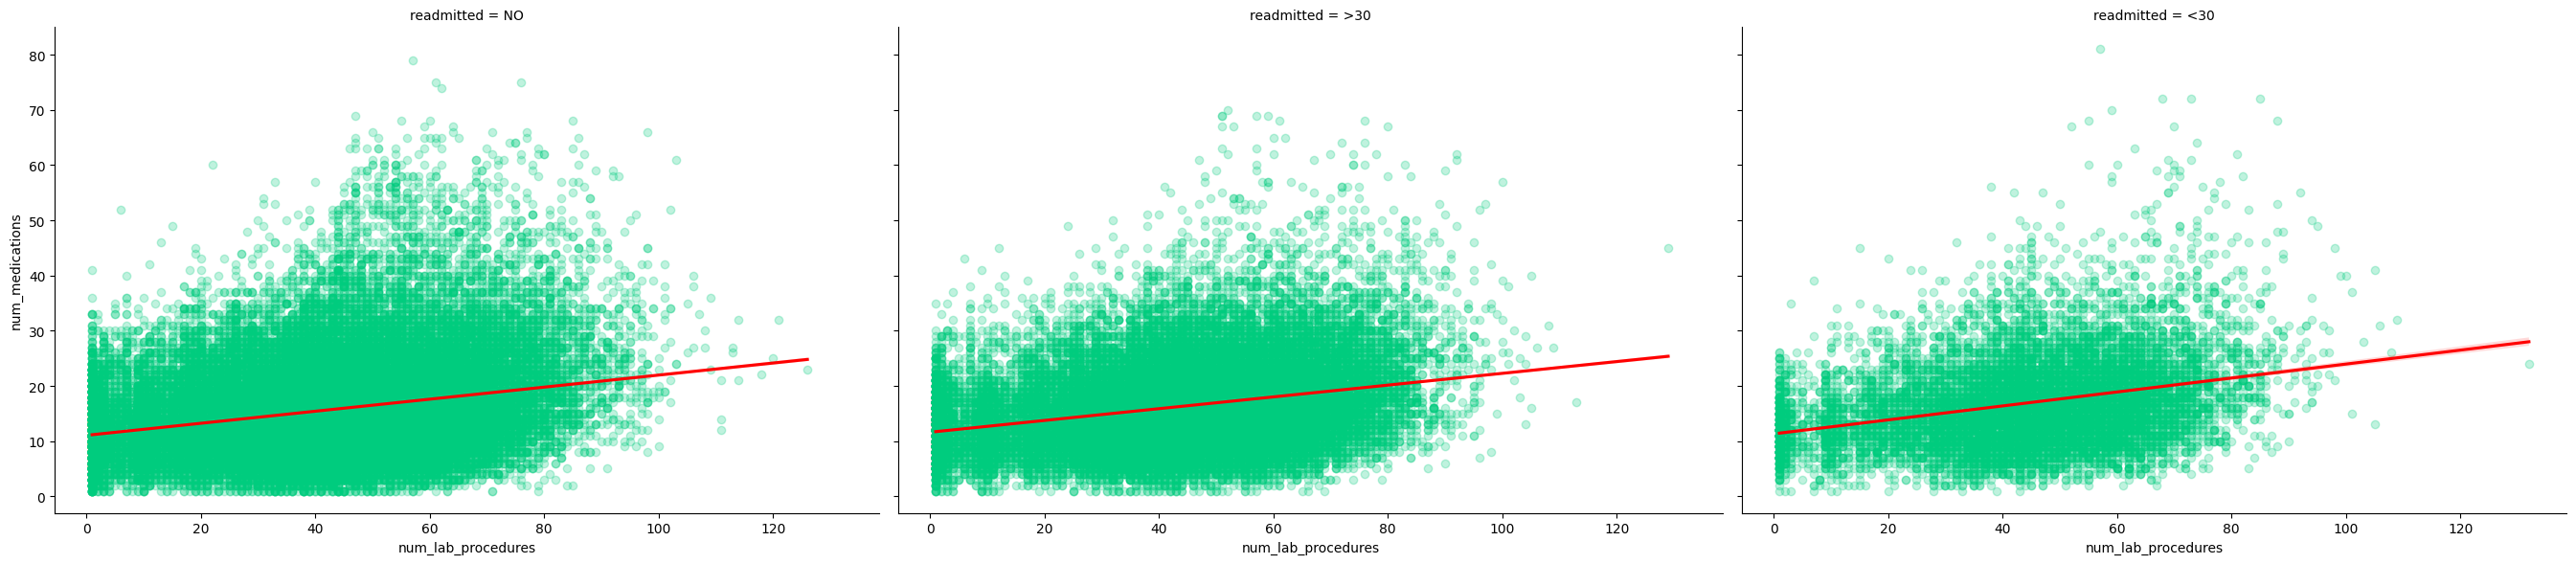

In [27]:
plt.figure(figsize=(15, 8))
sns.lmplot(x='num_lab_procedures', y='num_medications', col='readmitted', data=df, height=6, aspect=1.5, scatter_kws={'alpha':0.25, 'color': '#00cc7e'}, line_kws={'color': 'red'})
plt.show()

> #### Observaciones:
- Los 3 gráficos presentan una tendencia **leve positiva**: a mayor **'num_lab_procedures'** tiende a subir **'num_medications'**.
- La relación más fuerte o tendencia más positiva se presenta en pacientes que fueron readmitidos **antes de los 30 dias**.

&nbsp;
___

> ## Distribución de variables demográficas

In [28]:
variables_demograficas = ['race', 'gender', 'age']

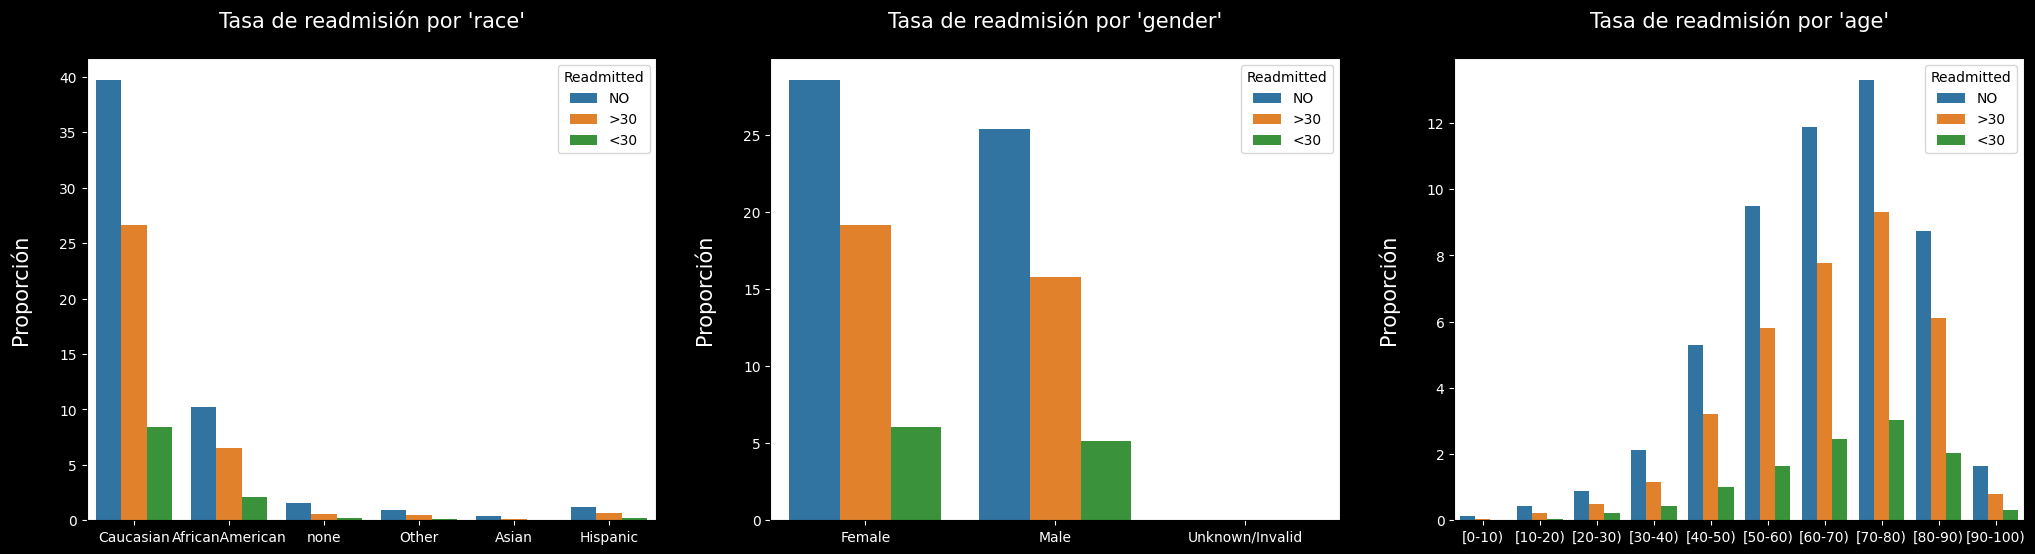

In [ ]:
# =====================================
# Countplots de variables demográficas
# =====================================

fig, axs = plt.subplots(1, 3, figsize=(25,6), facecolor='black')

for i in range(len(variables_demograficas)):

    sns.countplot(data=df, x=variables_demograficas[i], hue='readmitted', stat='percent', ax=axs[i])
    axs[i].set_title(f"Tasa de readmisión por '{variables_demograficas[i]}'", color='white', fontsize=15, y=1.05)
    axs[i].set_ylabel("Proporción", color='white', fontsize=15, labelpad=20)
    axs[i].set_xlabel("", color='white', fontsize=15, labelpad=20)
    axs[i].legend(title="Readmitted", )
    axs[i].tick_params(axis='both', colors='white')


> #### Observaciones:

**Countplot 'race':**
- La raza con mayor tasas de readmision y no readmision son los caucasicos.
- Las barras correspondientes a 'none' hacen referencia a registros en donde no se obtuvieron la variable de raza.

**Countplot 'gender':**
- El género 'Femenino' tiene mayor tasas de readmision (<30 y >30) y no readmision.
- El género 'Masculino' es similar al genero 'femenino' pero en menor proporción.
- El género 'Unknown/Invalid' hace referencia a las personas que no se identifican con los generos mencionados previamente.
    - Al ser solo 3 registros no se puede llegar a visualizar su grafico, ya que en proporcion son minusculos a comparación de los otros dos generos.
    - No se va a intentar inferir o llegar a una conclusión debido al reducido numero de registros.
 - Se puede inferir que ladiferencia entre los generos se podria atribuir a que a nivel mundial existe una mayor proporcion de mujeres que hombres.

**Countplot 'age':**
- Se observa que en general los grupos de edad de adultos mayores son los más afectados por la diabetes. 
- La edad de 75 (Grupo de edad [70, 80) ) es la que tiene mayores tasas de readmisón y no readmisión.

&nbsp;
___

> ## Distribución de variables clínicas

In [36]:
variables_clinicas = ['max_glu_serum', 'A1Cresult', 'readmitted']

df_variablesClinicas = df[variables_clinicas]

df_variablesClinicas

,max_glu_serum,A1Cresult,readmitted
0,NaN,NaN,NO
1,NaN,NaN,>30
2,NaN,NaN,NO
3,NaN,NaN,NO
4,NaN,NaN,NO
...,...,...,...
101761,NaN,>8,>30
101762,NaN,NaN,NO
101763,NaN,NaN,NO
101764,NaN,NaN,NO


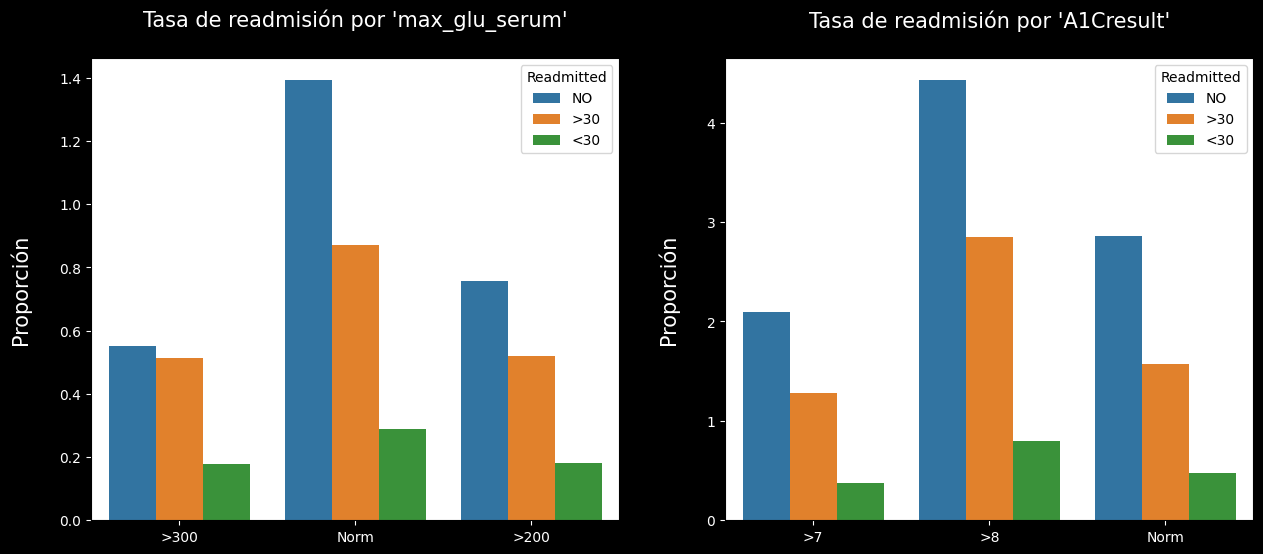

In [41]:
# ==================================
# Countplots de variables clínicas
# ==================================

fig, axs = plt.subplots(1, 2, figsize=(15,6), facecolor='black')
    
# El ciclo for se realiza "len(variables_clinicas) - 1" para no hacer un grafico erroneo con la columna de 'readmitted'.
for i in range(len(variables_clinicas) - 1):

    sns.countplot(data=df_variablesClinicas, x=variables_clinicas[i], hue='readmitted', stat='percent', ax=axs[i])
    axs[i].set_title(f"Tasa de readmisión por '{variables_clinicas[i]}'", color='white', fontsize=15, y=1.05)
    axs[i].set_ylabel("Proporción", color='white', fontsize=15, labelpad=20)
    axs[i].set_xlabel("", color='white', fontsize=15, labelpad=20)
    axs[i].legend(title="Readmitted", )
    axs[i].tick_params(axis='both', colors='white')

> #### Observaciones:

**Countplot 'max_glu_serum':** (Glucosa en suero (Parte líquida de la sangre))
- La categoría más frecuente es “Norm” (Glucosa en suero dentro de rango normal).
- La mayoria de pacientes no fueron readmitidos.
- Las readmisiones en menos de 30 días son las menos frecuentes en todas las categorías.
- En la categoria ">300" son similares la cantidad de pacientes que no readmiten y los que readmiten luego de 30 dias.

**Countplot 'A1Cresult':** (Glucosa en sangre luego de 3 meses)
- La categoría más frecuente es “>8” (Glucosa en sangre elevada).
- La mayoria de pacientes no fueron readmitidos.

&nbsp;
___

> ### Conclusiones Preliminares

- El grupo de edad de las personas mas afectadas pertenecen a los adultos mayores (70-80 años).
- La raza que tiene mayores tasas de readmision son los caucasicos.
- La estadia en el hospital de la mayoria de pacientes ronda entre 2 y 4 dias, con casos extremos, pero coherentes, de hasta 14 dias.
- En la mayoria de casos, tanto en variables numericas como cactegoricas (demograficas o clinicas) la mayor cantidad de pacientes no readmiten en las clinicas por casos de diabetes.
- Se observa un patron en todas las variables, en donde en los casos de readmision, siempre predomina la readmision despues de los 30 dias y no antes de los 30 dias.

&nbsp;
___

> ### Se guarda el DataSet con los cambios realizados

In [ ]:
df_clean = df.copy()
df_clean.to_csv('FuentesDeDatos_Diabetes/diabetic_data_v2.csv', index=False)

- El archivo se encuentra dentro de la carpeta "FuentesDeDatos_Diabetes" en la misma carpeta del archivo.